In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set_palette("GnBu_d")
%matplotlib inline

import folium
from folium import plugins
from folium.plugins import HeatMap
from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
from pathlib import Path

import geopy
from geopy.geocoders import GoogleV3
from geopy.distance import geodesic

In [2]:
df_cluster = pd.read_csv("../new_boston_2016_prep_cluster.csv")
# df_cluster = df

In [3]:
len(df_cluster)

1227562

### 1.5) Clustering

In [4]:
df_cluster.head(1)

,Unnamed: 0,Unnamed: 0.1,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_coordinates,end_coordinates,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start,weekday_end
0,0,0,2016-01-01 00:08:07,2016-01-01 00:40:26,36,19,Boston Public Library - 700 Boylston St.,Buswell St. at Park Dr.,1406,Subscriber,"(42.349673, -71.077303)","(42.347241, -71.105301)",2.322721,1939.0,4.312426,1.490849,2.225968,0,4,4


We can see that over time our dataframe has become quite feature rich

But for clustering we can only use a handful of features, therefore the following columns need to be dropped:

`start_time, end_time:` we use the start hour and duration of a trip instead

`start_station_id, end_station_id, start_station_name, end_station_name:` hold no valuable information for clustering

`bike_id:` we are focusing on trips and not the different bikes

`start_coordinates, end_coordinates:` can not be used for clustering as the algorithms can not know what these coordinates mean - instead we are using start_distance_center and end_distance_center

In [5]:
df_cluster.drop(['Unnamed: 0.1','Unnamed: 0','start_time','end_time','start_station_id','end_station_id','start_station_name','end_station_name','bike_id','start_coordinates','end_coordinates','weekday_end'], axis=1, inplace=True)

Now we can see the 8 remaining features

In [6]:
df_cluster.head(0)

,user_type,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start


In [7]:
df_cluster['user_type'] = df_cluster['user_type'].replace(['Customer','Subscriber'],[0,1])
# user_type:
# 0 = Customer
# 1 = Subscriber

In [8]:
# df_cluster['weekday_start'] = df_cluster['weekday_start'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# df_cluster['weekday_end'] = df_cluster['weekday_end'].replace([0,1,2,3,4,5,6],[0,0,0,0,0,1,1])
# 0 -> workday
# 1 -> weekend 

In [9]:
# df_cluster.drop(['duration_sec'], axis=1, inplace=True)
# df_cluster.drop(['speed_kmh'], axis=1, inplace=True)
# df_cluster.drop('start_hour', axis=1, inplace=True)
df_cluster.drop("user_type", axis=1, inplace=True)
# df_cluster.drop('weekday_start', axis=1, inplace=True) 
# df_cluster.drop(['start_distance_center','end_distance_center'], axis=1, inplace=True) 

#### All Cluster

X -> df_cluster bei workshop

In [10]:
X = df_cluster

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create a df out of array
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled_df.head(10)

,distance_km,duration_sec,speed_kmh,start_distance_center,end_distance_center,start_hour,weekday_start
0,0.372217,1.564819,-1.370620,-0.912488,-0.371260,-2.892635,0.639277
1,0.372217,1.549223,-1.364143,-0.912488,-0.371260,-2.892635,0.639277
2,0.372217,1.387591,-1.292397,-0.912488,-0.371260,-2.892635,0.639277
3,0.372217,1.352146,-1.275440,-0.912488,-0.371260,-2.892635,0.639277
4,-0.208537,0.149836,-0.884696,-0.912488,0.152522,-2.892635,0.639277
5,-0.648585,-0.724959,0.622296,0.356323,-1.562253,-2.892635,0.639277
6,1.494028,0.336988,0.761884,0.058861,1.633134,-2.892635,0.639277
7,-0.772882,-0.542060,-0.587706,1.536931,-0.547849,-2.892635,0.639277
8,-0.862973,-0.780253,0.175197,1.279682,0.309060,-2.892635,0.639277
9,-1.007851,-0.863905,0.129299,0.644137,1.278979,-2.892635,0.639277


In [12]:
df_scaled = X_scaled_df

In [13]:
from sklearn.cluster import KMeans

In [14]:
numbers = ["zero", "one", "two", "three","four","five","six","seven"]

In [15]:
# # refit algorithm
# two_means = KMeans(n_clusters=2)
# two_means.fit(X_scaled)

# # match records to clusters by calling predict
# # two_means.predict(X_scaled)

# df_scaled["clusters"] = two_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [16]:
# three_means = KMeans(n_clusters=3)
# three_means.fit(X_scaled)
# df_scaled["clusters"] = three_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [17]:
# four_means = KMeans(n_clusters=4)
# four_means.fit(X_scaled)
# df_scaled["clusters"] = four_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [18]:
# five_means = KMeans(n_clusters=5)
# five_means.fit(X_scaled)
# df_scaled["clusters"] = five_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

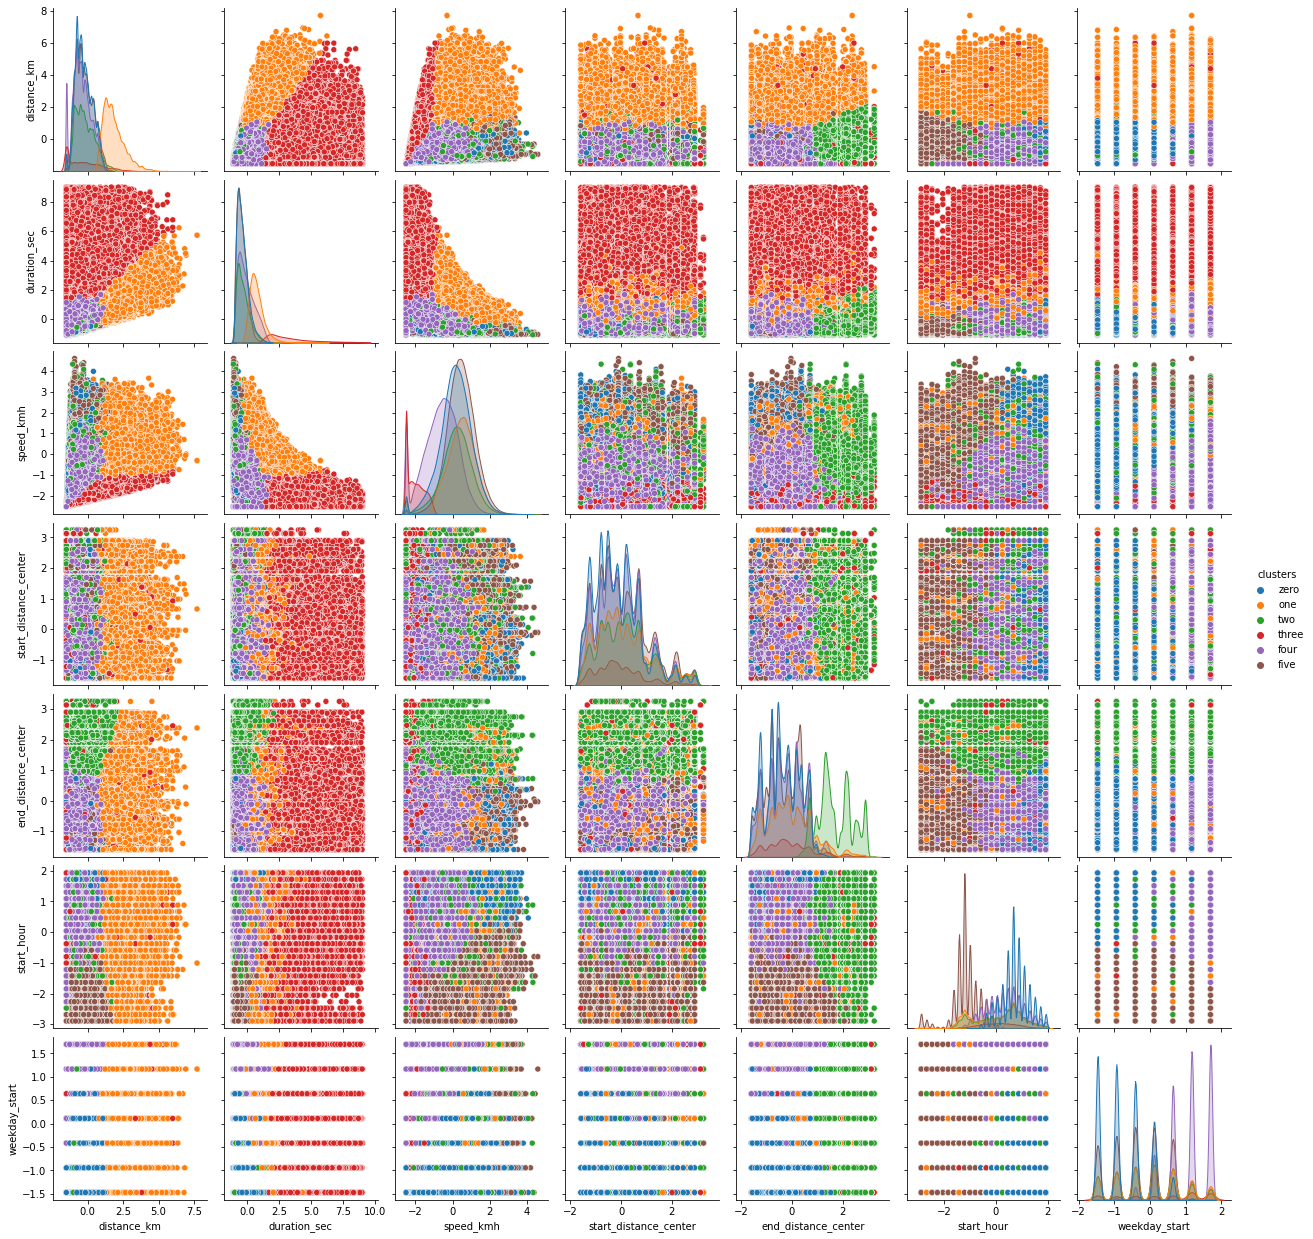

In [19]:
numbers_6 = ["zero", "one", "two", "three","four","five"]
six_means = KMeans(n_clusters=6, random_state = 6)
six_means.fit(X_scaled)
df_scaled["clusters"] = six_means.predict(X_scaled)
df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
plot_6 = sns.pairplot(data=df_scaled, hue="clusters",hue_order = numbers_6)

In [20]:
plot_6.figure.savefig('C:/Users/rfrei/Desktop/1200000_6.png',dpi = 300)


In [21]:
# seven_means = KMeans(n_clusters=7)
# seven_means.fit(X_scaled)
# df_scaled["clusters"] = seven_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")

In [22]:
# eight_means = KMeans(n_clusters=8)
# eight_means.fit(X_scaled)
# df_scaled["clusters"] = eight_means.predict(X_scaled)
# df_scaled["clusters"] = df_scaled["clusters"].apply(lambda x: numbers[x])
# sns.pairplot(data=df_scaled, hue="clusters")